In [17]:
import sklearn
from sklearn import model_selection
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv("Logistic_X_Train.csv")

In [96]:
data.head()

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [97]:
labels = pd.read_csv("Logistic_Y_Train.csv")

In [98]:
labels.head()

,label
0,0
1,0
2,1
3,0
4,1


In [99]:
data['label'] = labels['label']

In [100]:
data

,f1,f2,label
0,0.574727,0.787277,0
1,0.251502,0.908940,0
2,1.860578,0.013763,1
3,0.019477,1.047210,0
4,0.029794,0.252236,1
...,...,...,...
2245,1.694862,0.031078,1
2246,-0.015928,-0.145282,1
2247,0.441794,-0.387912,1
2248,0.219570,-0.117130,1


In [101]:
count = pd.value_counts(labels['label'], sort = True)

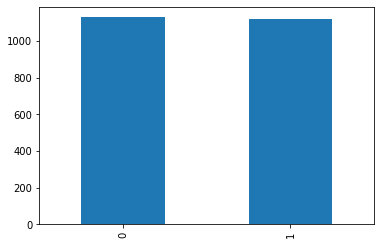

In [102]:
count.plot(kind = "bar")

# We will try to classify the data with a number of Machine Learning Algorithms:
1. Logistic Regression
2. Naive Bayes/ Gaussian NB
3. Decision Tree
4. SVM
5. KNeighbours Classifier
6. Random Forest Classifier
7. Perceptron
8. Neural Net

In [103]:
X_train = data[['f1', 'f2']]
Y_train = data['label']

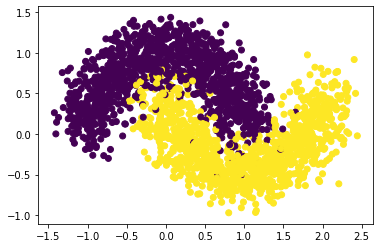

In [104]:
plt.scatter(X_train['f1'], X_train['f2'], c= Y_train)

In [105]:
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train)

In [106]:
X_val.shape

(563, 2)

In [107]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
Logistic = LogisticRegression()
Logistic_boundary = Logistic.fit( X_train,  Y_train)

C:\Users\HARSHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
Logistic_boundary

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

No handles with labels found to put in legend.


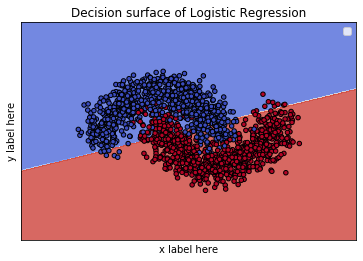

In [112]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Logistic Regression')
# Set-up grid for plotting.
X0, X1 = X_train['f1'], X_train['f2']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, Logistic_boundary, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Accuracy:  0.8650088809946714
F1:  0.8587360594795538


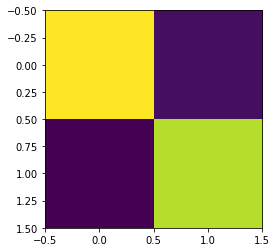

In [113]:
plt.imshow(confusion_matrix(Y_val, Logistic.predict(X_val)))
Logistic_accuracy = accuracy_score(Y_val, Logistic.predict(X_val))
Logistic_f1 = f1_score(Y_val, Logistic.predict(X_val))
print("Accuracy: ", Logistic_accuracy)
print("F1: ", Logistic_f1)

# Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
Naive = GaussianNB()

In [116]:
Naive_boundary = Naive.fit(X_train, Y_train)

No handles with labels found to put in legend.


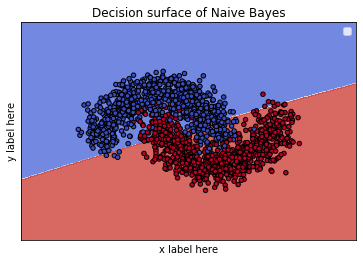

In [117]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Naive Bayes')
# Set-up grid for plotting.
X0, X1 = X_train['f1'], X_train['f2']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, Naive_boundary, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Accuracy:  0.866785079928952
F1:  0.8598130841121496


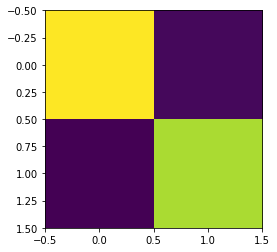

In [118]:
plt.imshow(confusion_matrix(Y_val, Naive.predict(X_val)))
print("Accuracy: ", accuracy_score(Y_val, Naive.predict(X_val)))
Naive_accuracy = accuracy_score(Y_val, Naive.predict(X_val))
Naive_f1 = f1_score(Y_val, Naive.predict(X_val))
print("F1: ", f1_score(Y_val, Naive.predict(X_val)))

# Decision Trees

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
Tree = DecisionTreeClassifier()

In [121]:
Tree_boundary = Tree.fit(X_train, Y_train)

No handles with labels found to put in legend.


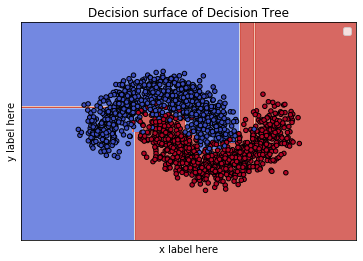

In [122]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Decision Tree')
# Set-up grid for plotting.
X0, X1 = X_train['f1'], X_train['f2']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, Tree_boundary, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Accuracy:  0.9626998223801065
F1:  0.960747663551402


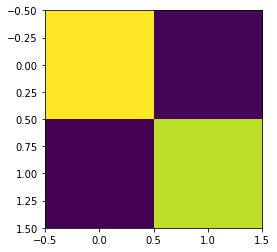

In [123]:
plt.imshow(confusion_matrix(Y_val, Tree.predict(X_val)))
Tree_accuracy = accuracy_score(Y_val, Tree.predict(X_val))
Tree_f1 = f1_score(Y_val, Tree.predict(X_val))
print("Accuracy: ", accuracy_score(Y_val, Tree.predict(X_val)))
print("F1: ", f1_score(Y_val, Tree.predict(X_val)))

In [124]:
from sklearn.svm import SVC

In [125]:
svm = SVC()

In [126]:
svm_boundary = svm.fit(X_train, Y_train)

C:\Users\HARSHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


No handles with labels found to put in legend.


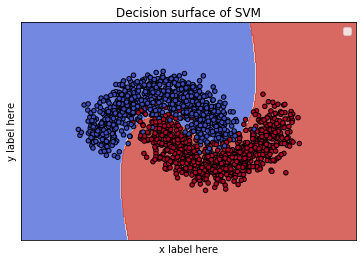

In [127]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVM')
# Set-up grid for plotting.
X0, X1 = X_train['f1'], X_train['f2']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_boundary, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Accuracy:  0.955595026642984
F1:  0.9523809523809524


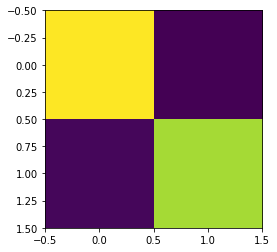

In [128]:
plt.imshow(confusion_matrix(Y_val, svm.predict(X_val)))
svm_accuracy = accuracy_score(Y_val, svm.predict(X_val))
svm_f1 = f1_score(Y_val, svm.predict(X_val))
print("Accuracy: ", accuracy_score(Y_val, svm.predict(X_val)))
print("F1: ", f1_score(Y_val, svm.predict(X_val)))

# K Neighbors Classifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
kneighbors = KNeighborsClassifier()

In [131]:
kneighbors_boundary = kneighbors.fit(X_train, Y_train)

No handles with labels found to put in legend.


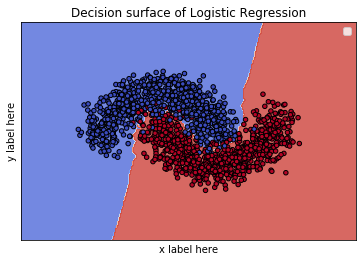

In [132]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Logistic Regression')
# Set-up grid for plotting.
X0, X1 = X_train['f1'], X_train['f2']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, kneighbors_boundary, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Accuracy:  0.9538188277087034
F1:  0.9501915708812261


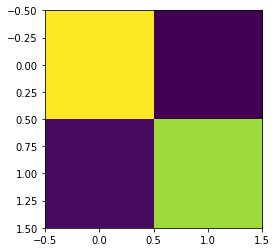

In [133]:
plt.imshow(confusion_matrix(Y_val, kneighbors.predict(X_val)))
kneighbors_accuracy = accuracy_score(Y_val, kneighbors.predict(X_val))
kneighbors_f1 = f1_score(Y_val, kneighbors.predict(X_val))
print("Accuracy: ", accuracy_score(Y_val, kneighbors.predict(X_val)))
print("F1: ", f1_score(Y_val, kneighbors.predict(X_val)))

# Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
forest = RandomForestClassifier()

In [136]:
forest_boundary = forest.fit(X_train, Y_train)

C:\Users\HARSHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


No handles with labels found to put in legend.


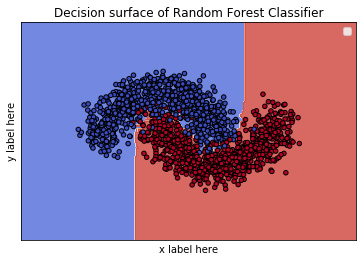

In [137]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest Classifier')
# Set-up grid for plotting.
X0, X1 = X_train['f1'], X_train['f2']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, forest_boundary, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Accuracy:  0.955595026642984
F1:  0.9521988527724666


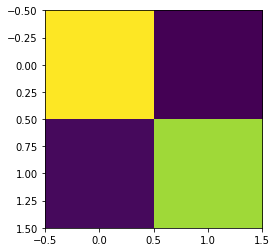

In [138]:
plt.imshow(confusion_matrix(Y_val, forest.predict(X_val)))
forest_accuracy = accuracy_score(Y_val, forest.predict(X_val))
forest_f1 = f1_score(Y_val, forest.predict(X_val))
print("Accuracy: ", accuracy_score(Y_val, forest.predict(X_val)))
print("F1: ", f1_score(Y_val, forest.predict(X_val)))

# Neural Net

In [139]:
tf.keras.backend.clear_session()
neuralnet = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (2, 1)),
    tf.keras.layers.Dense(4, ),
    tf.keras.layers.Softmax(),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Softmax(),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Softmax(),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Softmax(),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Softmax()
])

In [140]:
neuralnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
softmax_2 (Softmax)          (None, 4)                 0

In [142]:
neuralnet.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy", "Precision", "Recall"]
)

In [143]:
X_train = X_train.to_numpy()

In [144]:
X_val = X_val.to_numpy()
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [145]:
y_train = tf.keras.utils.to_categorical(Y_train)
y_val = tf.keras.utils.to_categorical(Y_val)

In [146]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [147]:
neuralnet_boundary = neuralnet.fit(X_train.reshape(X_train.shape[0],X_train.shape[1], 1), y_train, verbose = 2, epochs = 100, validation_data = (X_val, y_val))

Train on 1687 samples, validate on 563 samples
Epoch 1/100
1687/1687 - 3s - loss: 0.7166 - accuracy: 0.4926 - Precision: 0.4926 - Recall: 0.4926 - val_loss: 0.6953 - val_accuracy: 0.5293 - val_Precision: 0.5293 - val_Recall: 0.5293
Epoch 2/100
1687/1687 - 0s - loss: 0.7008 - accuracy: 0.4926 - Precision: 0.4926 - Recall: 0.4926 - val_loss: 0.6920 - val_accuracy: 0.5293 - val_Precision: 0.5293 - val_Recall: 0.5293
Epoch 3/100
1687/1687 - 0s - loss: 0.6954 - accuracy: 0.4926 - Precision: 0.4926 - Recall: 0.4926 - val_loss: 0.6924 - val_accuracy: 0.5293 - val_Precision: 0.5293 - val_Recall: 0.5293
Epoch 4/100
1687/1687 - 0s - loss: 0.6939 - accuracy: 0.4926 - Precision: 0.4926 - Recall: 0.4926 - val_loss: 0.6929 - val_accuracy: 0.5293 - val_Precision: 0.5293 - val_Recall: 0.5293
Epoch 5/100
1687/1687 - 0s - loss: 0.6934 - accuracy: 0.4973 - Precision: 0.4973 - Recall: 0.4973 - val_loss: 0.6940 - val_accuracy: 0.4707 - val_Precision: 0.4707 - val_Recall: 0.4707
Epoch 6/100
1687/1687 - 0s -

Epoch 45/100
1687/1687 - 0s - loss: 0.3304 - accuracy: 0.8749 - Precision: 0.8749 - Recall: 0.8749 - val_loss: 0.3257 - val_accuracy: 0.8810 - val_Precision: 0.8810 - val_Recall: 0.8810
Epoch 46/100
1687/1687 - 0s - loss: 0.3295 - accuracy: 0.8743 - Precision: 0.8743 - Recall: 0.8743 - val_loss: 0.3256 - val_accuracy: 0.8792 - val_Precision: 0.8792 - val_Recall: 0.8792
Epoch 47/100
1687/1687 - 0s - loss: 0.3279 - accuracy: 0.8743 - Precision: 0.8743 - Recall: 0.8743 - val_loss: 0.3237 - val_accuracy: 0.8792 - val_Precision: 0.8792 - val_Recall: 0.8792
Epoch 48/100
1687/1687 - 0s - loss: 0.3265 - accuracy: 0.8737 - Precision: 0.8737 - Recall: 0.8737 - val_loss: 0.3223 - val_accuracy: 0.8810 - val_Precision: 0.8810 - val_Recall: 0.8810
Epoch 49/100
1687/1687 - 0s - loss: 0.3248 - accuracy: 0.8731 - Precision: 0.8731 - Recall: 0.8731 - val_loss: 0.3220 - val_accuracy: 0.8792 - val_Precision: 0.8792 - val_Recall: 0.8792
Epoch 50/100
1687/1687 - 0s - loss: 0.3238 - accuracy: 0.8737 - Precis

1687/1687 - 0s - loss: 0.2740 - accuracy: 0.8897 - Precision: 0.8897 - Recall: 0.8897 - val_loss: 0.2743 - val_accuracy: 0.8899 - val_Precision: 0.8899 - val_Recall: 0.8899
Epoch 90/100
1687/1687 - 0s - loss: 0.2719 - accuracy: 0.8921 - Precision: 0.8921 - Recall: 0.8921 - val_loss: 0.2715 - val_accuracy: 0.8899 - val_Precision: 0.8899 - val_Recall: 0.8899
Epoch 91/100
1687/1687 - 0s - loss: 0.2708 - accuracy: 0.8915 - Precision: 0.8915 - Recall: 0.8915 - val_loss: 0.2699 - val_accuracy: 0.8917 - val_Precision: 0.8917 - val_Recall: 0.8917
Epoch 92/100
1687/1687 - 0s - loss: 0.2701 - accuracy: 0.8909 - Precision: 0.8909 - Recall: 0.8909 - val_loss: 0.2682 - val_accuracy: 0.8934 - val_Precision: 0.8934 - val_Recall: 0.8934
Epoch 93/100
1687/1687 - 0s - loss: 0.2677 - accuracy: 0.8975 - Precision: 0.8975 - Recall: 0.8975 - val_loss: 0.2671 - val_accuracy: 0.8917 - val_Precision: 0.8917 - val_Recall: 0.8917
Epoch 94/100
1687/1687 - 0s - loss: 0.2660 - accuracy: 0.8933 - Precision: 0.8933 -

In [148]:
X_val.shape

(563, 2, 1)

Accuracy:  0.9005328596802842
F1:  0.8985507246376812


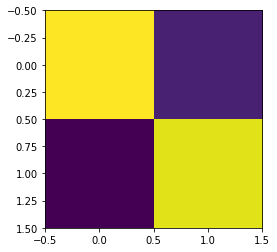

In [149]:
plt.imshow(confusion_matrix(Y_val, np.argmax(neuralnet.predict(X_val), axis = 1)))
neuralnet_accuracy = accuracy_score(Y_val, np.argmax(neuralnet.predict(X_val), axis = 1) )
neuralnet_f1 = f1_score(Y_val, np.argmax(neuralnet.predict(X_val), axis = 1))
print("Accuracy: ", accuracy_score(Y_val, np.argmax(neuralnet.predict(X_val), axis = 1) ))
print("F1: ", f1_score(Y_val, np.argmax(neuralnet.predict(X_val), axis = 1)))

# Analysis of all algorithms.

In [150]:
models = pd.DataFrame({
    'Model' : [Logistic, Naive, Tree, forest, neuralnet, kneighbors, svm],
    'Accuracy' : [Logistic_accuracy, Naive_accuracy, Tree_accuracy, forest_accuracy, neuralnet_accuracy, kneighbors_accuracy,
                  svm_accuracy],
    'F1': [Logistic_f1, Naive_f1, Tree_f1, forest_f1, neuralnet_f1, kneighbors_f1, svm_f1]
    
})

In [151]:
models

,Model,Accuracy,F1
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.865009,0.858736
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.866785,0.859813
2,"DecisionTreeClassifier(class_weight=None, crit...",0.962700,0.960748
3,"(DecisionTreeClassifier(class_weight=None, cri...",0.955595,0.952199
4,<tensorflow.python.keras.engine.sequential.Seq...,0.900533,0.898551
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.953819,0.950192
6,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.955595,0.952381


In [152]:
models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy,F1
2,"DecisionTreeClassifier(class_weight=None, crit...",0.962700,0.960748
3,"(DecisionTreeClassifier(class_weight=None, cri...",0.955595,0.952199
6,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.955595,0.952381
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.953819,0.950192
4,<tensorflow.python.keras.engine.sequential.Seq...,0.900533,0.898551
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.866785,0.859813
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.865009,0.858736


In [153]:
models.sort_values(by = 'F1', ascending = False)

,Model,Accuracy,F1
2,"DecisionTreeClassifier(class_weight=None, crit...",0.962700,0.960748
6,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.955595,0.952381
3,"(DecisionTreeClassifier(class_weight=None, cri...",0.955595,0.952199
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.953819,0.950192
4,<tensorflow.python.keras.engine.sequential.Seq...,0.900533,0.898551
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.866785,0.859813
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.865009,0.858736


In [158]:
X_test = pd.read_csv("Logistic_X_Test.csv")

In [159]:
test

,f1,f2
0,-0.799827,-0.003833
1,-0.757785,1.031370
2,1.036808,-0.357004
3,0.569531,1.083775
4,0.954205,-0.598412
...,...,...
745,-0.861953,0.121555
746,2.125937,0.049084
747,0.914724,0.517849
748,-0.813262,0.651115


In [160]:
Y_test = Tree.predict(X_test)

In [161]:
Y_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [164]:
test = pd.DataFrame({'label':Y_test})

,label
0,0
1,0
2,1
3,0
4,1
...,...
745,0
746,1
747,0
748,0
